###*Importing Libraries*###


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

###*Importing Dataset*###

In [ ]:
df=pd.read_csv("/content/data.csv")

###*Reading Dataset*###

In [ ]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


###*Exploring Dataset*###


> Shape

> Datatype

> Finding Duplicate

> Finding Null Attributes

> Description of the table

> Table Info

> MinMax Scaling














In [ ]:
df.drop("Id number",inplace=True,axis=1)

In [ ]:
df.shape

(214, 10)

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.shape

(214, 10)

In [ ]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df.iloc[35:42,]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
35,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.0,1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0,1
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.0,1
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.0,1


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.iloc[35:42,]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
35,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.0,1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0,1
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.0,1
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.0,1
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.0,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type of glass,213.0,2.788732,2.105130,1.00000,1.00000,2.00000,3.00000,7.00000


In [ ]:
df.memory_usage()

Index            1704
RI               1704
Na               1704
Mg               1704
Al               1704
Si               1704
K                1704
Ca               1704
Ba               1704
Fe               1704
Type of glass    1704
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [ ]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
df['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

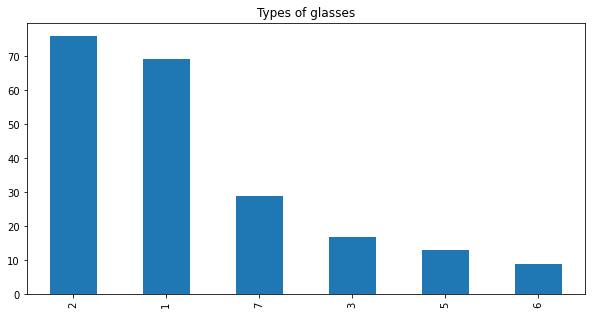

In [ ]:
df['Type of glass'].value_counts().plot.bar(figsize=(10,5), title= 'Types of glasses')

If we have null values ,we can fill that null values with mean value of that coloumn.

In [ ]:
#df['Al'] = df['Al'].fillna(df['Al'].mean())

In [ ]:
#df['Mg'] = df['Mg'].fillna(df['Mg'].mean())

When our data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.
This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent.

To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima.

It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
features =df.columns[:-1].tolist()
for i in features:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.315968,0.402118,0.596704,0.361210,0.508048,0.080334,0.327517,0.055831,0.112308,2.788732
std,0.133142,0.122806,0.321535,0.154494,0.138214,0.105183,0.132517,0.158173,0.191352,2.105130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.235733,0.326316,0.465479,0.280374,0.441071,0.020934,0.261152,0.000000,0.000000,1.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.090177,0.294610,0.000000,0.000000,2.000000
75%,0.351185,0.463158,0.801782,0.417445,0.585714,0.098229,0.345725,0.000000,0.196078,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


###*Data Visualization*###


<Figure size 576x576 with 0 Axes>

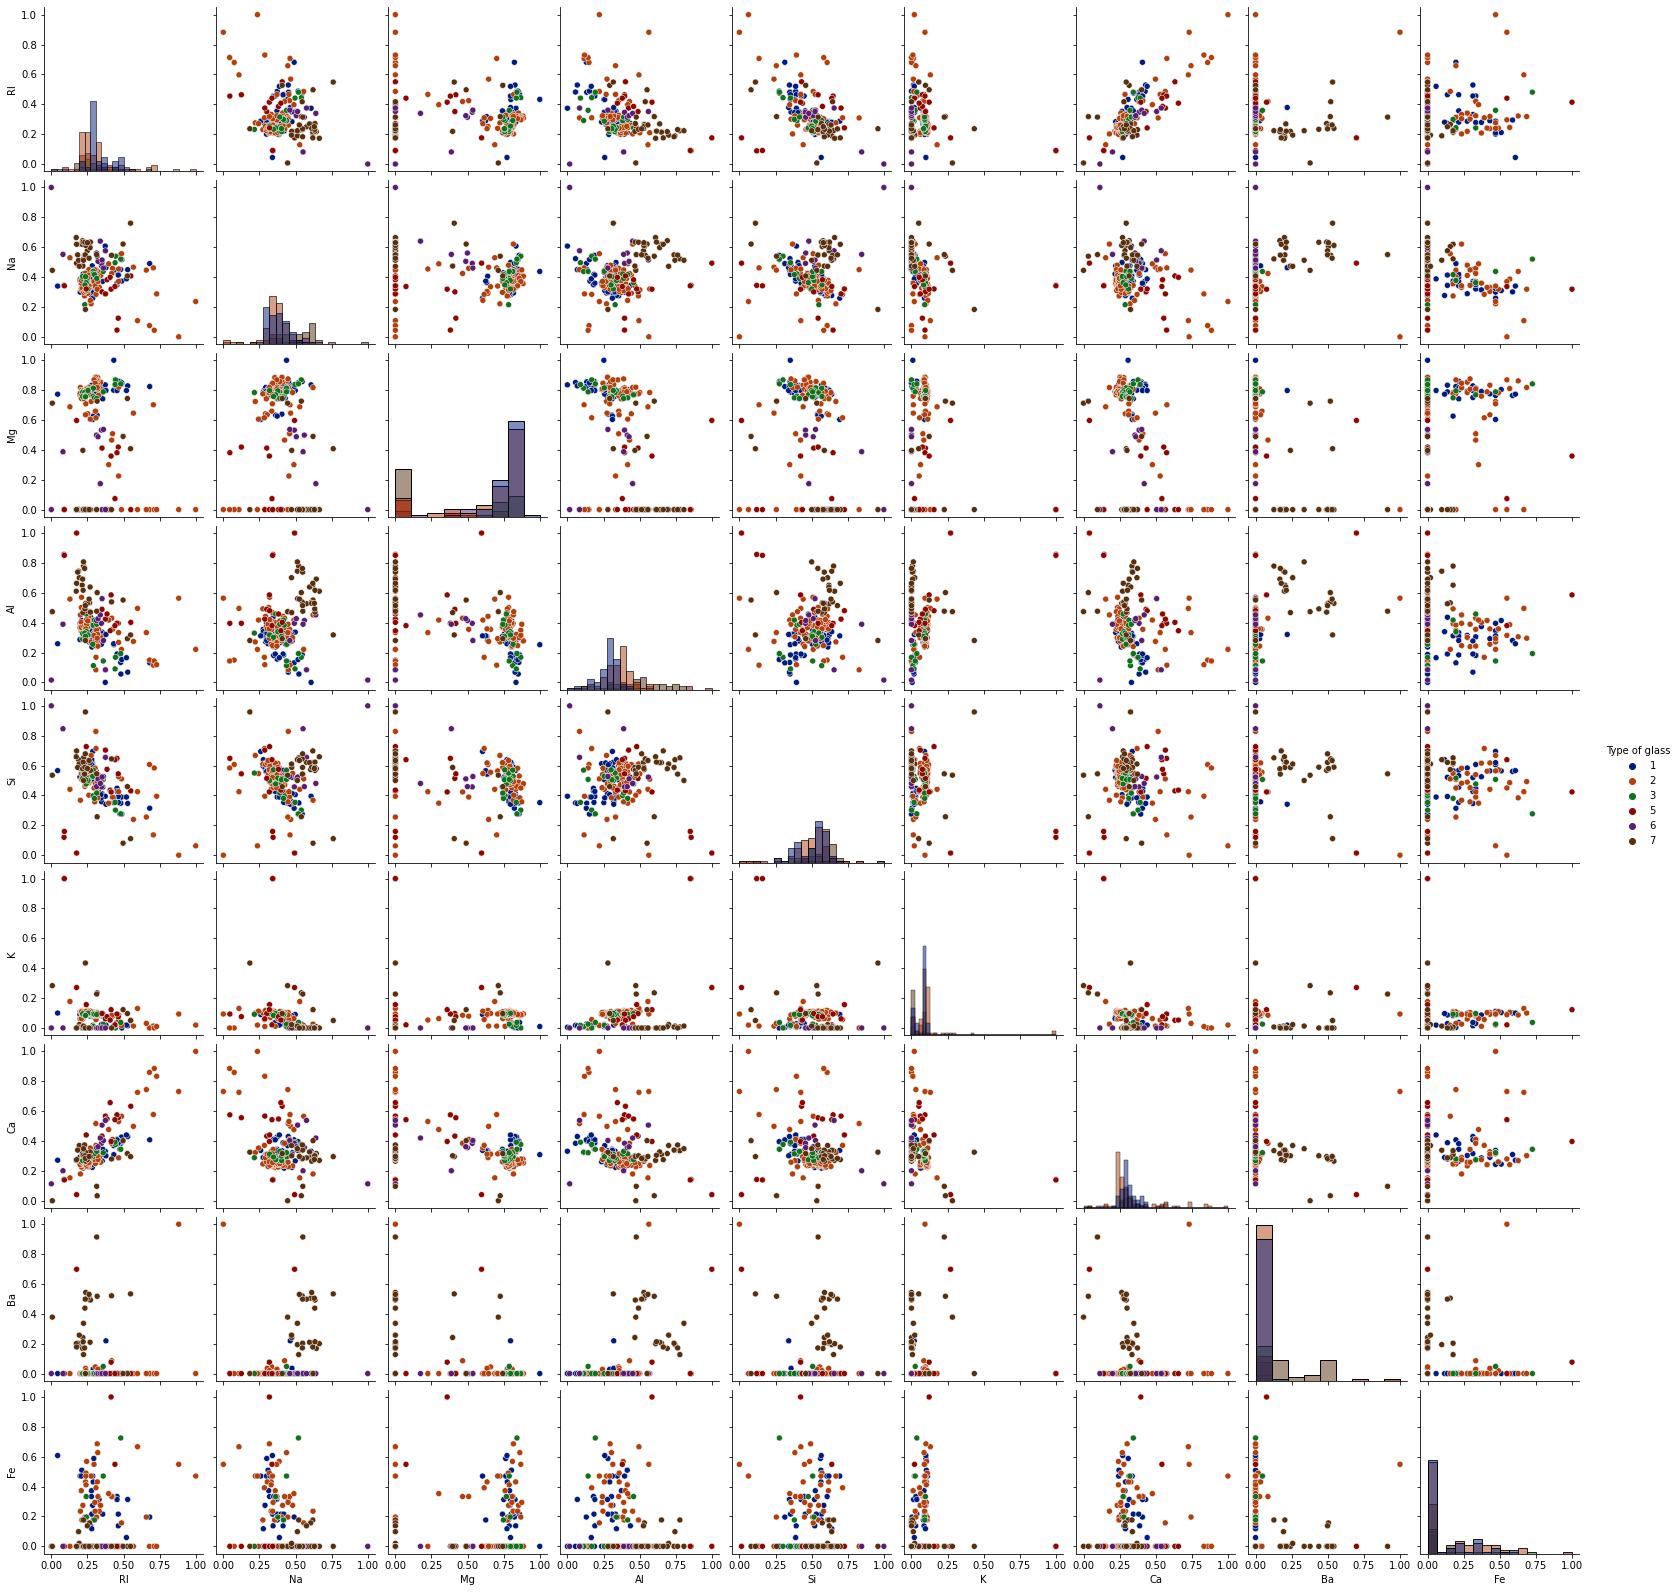

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='dark',hue='Type of glass',diag_kind="hist")
plt.show()

###*Finding Correlation of the dataset between all the columns*###

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


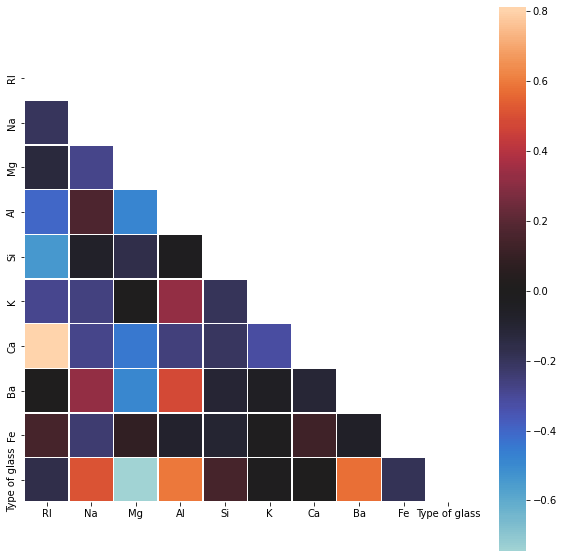

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

In [ ]:
df[['RI','Na',	'Mg',	'Al',	'Si',	'K',	'Ca',	'Ba',	'Fe']].corrwith(df['Type of glass'])

RI   -0.160140
Na    0.508837
Mg   -0.744195
Al    0.597432
Si    0.147725
K    -0.012455
Ca    0.002677
Ba    0.574896
Fe   -0.191090
dtype: float64

###*Checking Outliers in the Dataset*

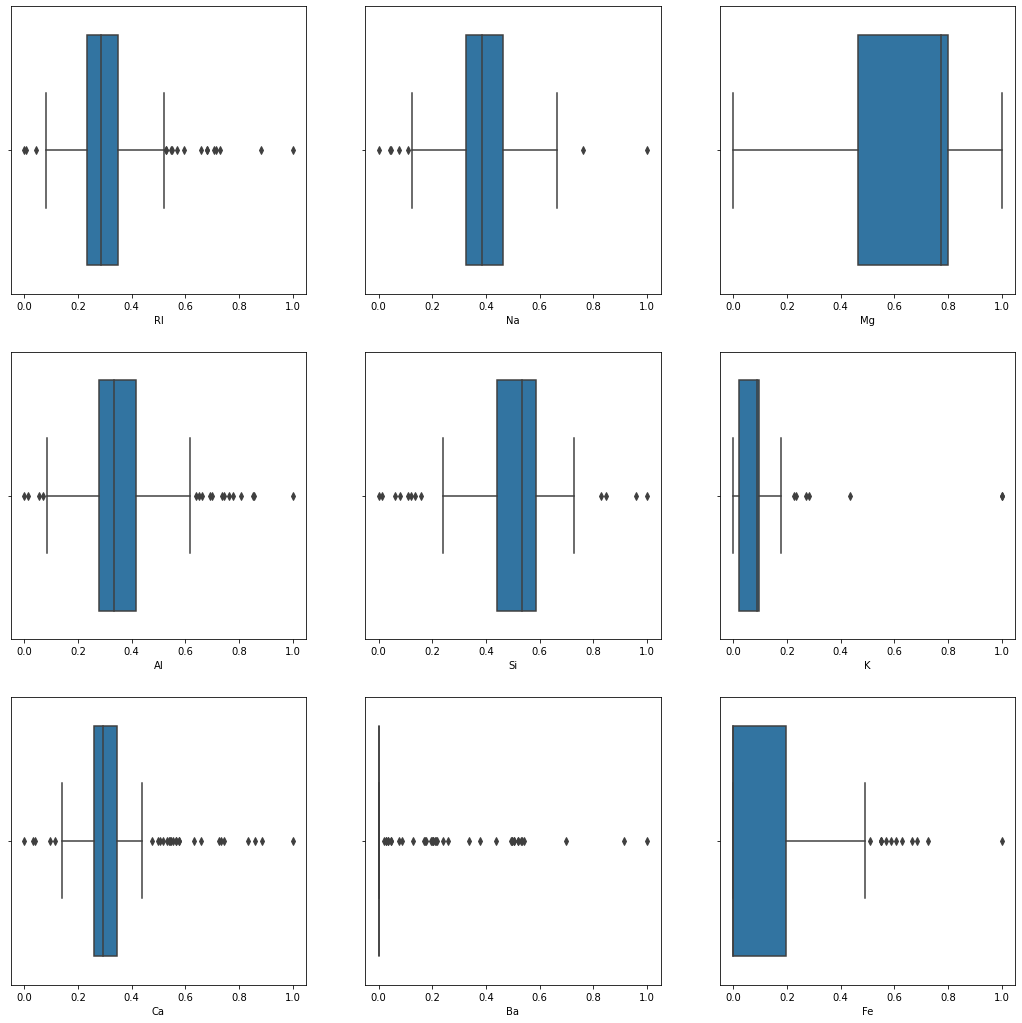

In [ ]:
plt.figure(figsize=(18,18))
j=0
for i in features:
  plt.subplot(3,3,j+1)
  j=j+1
  sns.boxplot(x=i, data=df)

###*Removing Outliers*###

In [ ]:
def outlier_find(glass):
    outlier_indices = []

    for col in glass.columns[:-1].tolist():
        Q1 = np.percentile(glass[col],25)
        Q3 = np.percentile(glass[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v>1)
    return multiple_outliers

In [ ]:
features =df.columns[:-1].tolist()
print('The dataset contains %d observations with outliers' %(len(outlier_find(df))))

The dataset contains 35 observations with outliers


In [ ]:
outlier_indices = outlier_find(df[features])
df=df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(181, 10)


###*Data Visualisation*###
1.   Regression Plot
2.   Hist and Dist Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


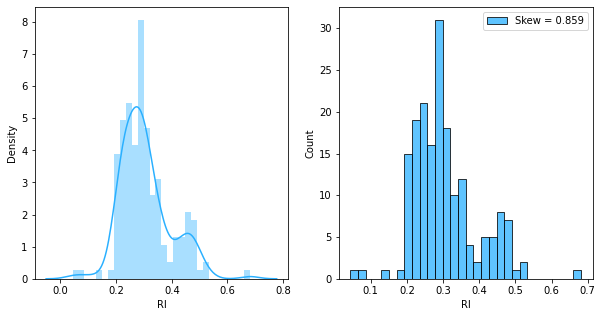

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


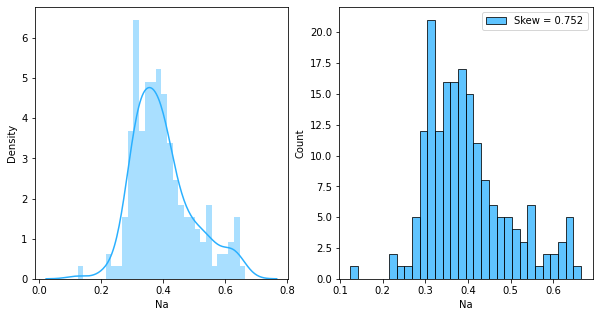

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


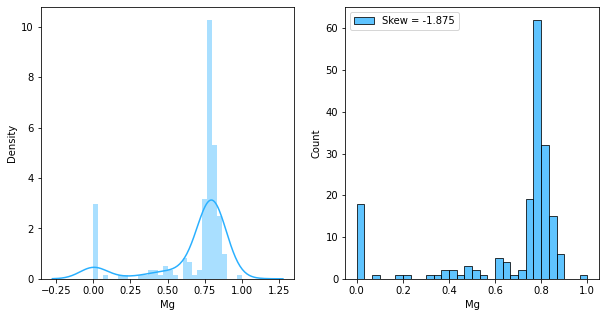

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


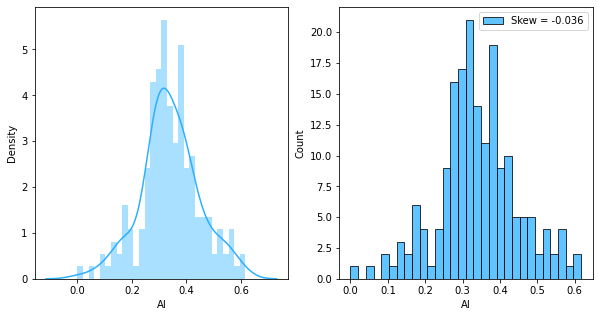

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


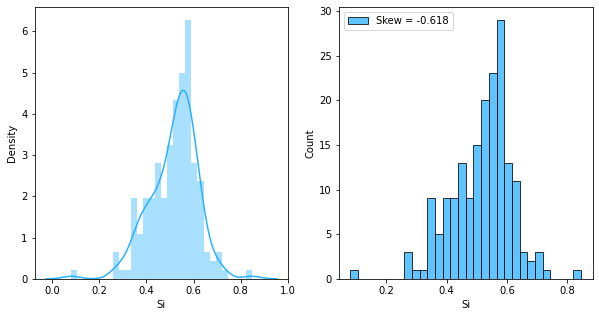

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


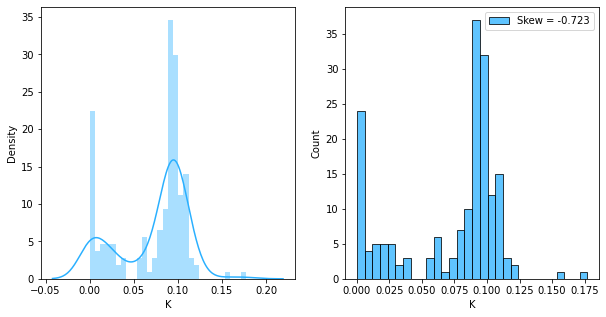

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


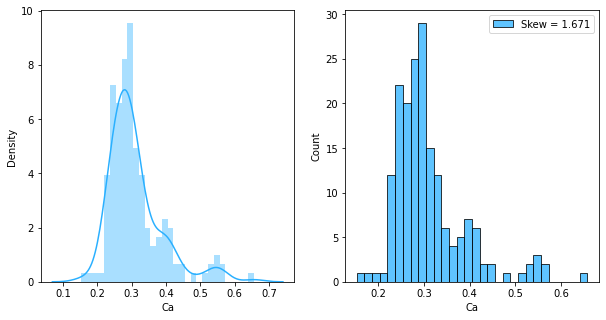

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


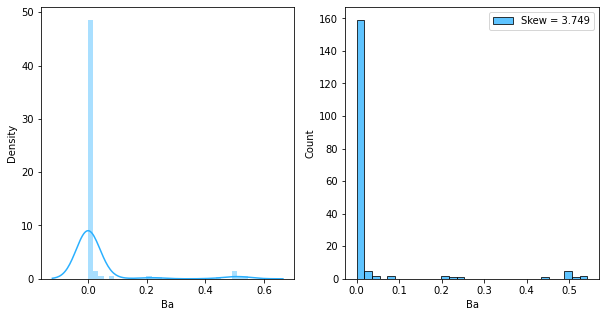

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


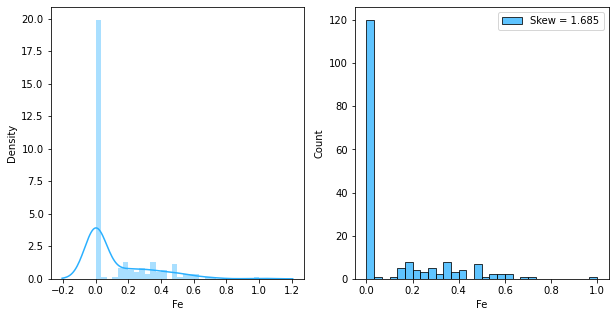

In [ ]:
features =df.columns[:-1].tolist()
for i in features:
    skew = df[i].skew()
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')
    plt.subplot(1,2,2)
    sns.histplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')
    plt.legend(loc='best')
    plt.show()

###*Train Test Split*

In [ ]:
x=df[['RI','Na',	'Mg',	'Al',	'Si',	'K',	'Ca',	'Ba',	'Fe']]
y=df['Type of glass']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20 )
x_train.shape

(144, 9)

###*KNN Classifier*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([1, 1, 2, 5, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 7,
       6, 5, 1, 1, 1, 2, 1, 5, 1, 7, 2, 1, 1, 1, 1])

In [ ]:
knn.score(x_test, y_test)

0.7837837837837838

In [ ]:
print("Mean absolute error is : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error is  : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error is : ",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error is :  0.21621621621621623
Mean squared error is  :  0.21621621621621623
Root Mean Squared error is :  0.46499055497527714


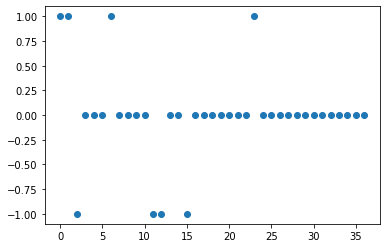

In [ ]:
x=np.array(np.arange(0,x_test.shape[0],1))
plt.scatter(x,y_test-y_pred)

###*Naive Bayes Classifier*

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_prednb = nb.predict(x_test)

In [ ]:
y_prednb

array([2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3, 1, 7,
       6, 6, 3, 2, 2, 2, 2, 5, 6, 7, 2, 1, 2, 1, 2])

In [ ]:
print("Mean absolute error is : ",metrics.mean_absolute_error(y_test,y_prednb))
print("Mean squared error is  : ",metrics.mean_squared_error(y_test,y_prednb))
print("Root Mean Squared error is : ",np.sqrt(metrics.mean_absolute_error(y_test,y_prednb)))

Mean absolute error is :  0.5945945945945946
Mean squared error is  :  1.4054054054054055
Root Mean Squared error is :  0.7710996009560598


In [ ]:
nb.score(x_test, y_test)

0.6216216216216216

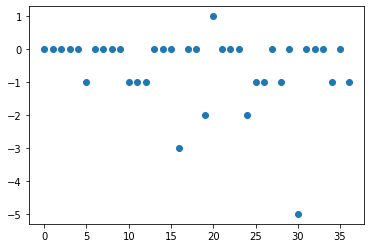

In [ ]:
x=np.array(np.arange(0,x_test.shape[0],1))
plt.scatter(x,y_test-y_prednb)

###*Support Vector Machine (SVM)*

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

SVC()

In [ ]:
svm.score(x_test, y_test)

0.7837837837837838

In [ ]:
y_predsvm = svm.predict(x_test)

In [ ]:
y_predsvm

array([1, 2, 1, 5, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 5, 2, 1, 1, 2, 7,
       6, 5, 1, 1, 1, 2, 1, 5, 1, 7, 2, 1, 1, 1, 2])

In [ ]:
print("Mean absolute error is : ",metrics.mean_absolute_error(y_test,y_predsvm))
print("Mean squared error is  : ",metrics.mean_squared_error(y_test,y_predsvm))
print("Root Mean Squared error is : ",np.sqrt(metrics.mean_absolute_error(y_test,y_predsvm)))

Mean absolute error is :  0.2702702702702703
Mean squared error is  :  0.43243243243243246
Root Mean Squared error is :  0.5198752449100363


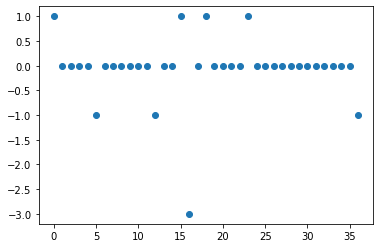

In [ ]:
x=np.array(np.arange(0,x_test.shape[0],1))
plt.scatter(x,y_test-y_predsvm)

###*Decision Tree*

In [ ]:
test_dt = DecisionTreeClassifier(criterion="entropy")
test_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_preddt = test_dt.predict(x_test)
y_preddt

array([2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 6, 2, 2, 1, 2, 7,
       6, 6, 3, 1, 2, 2, 1, 5, 1, 7, 2, 1, 1, 1, 2])

In [ ]:
print("Mean absolute error is : ",metrics.mean_absolute_error(y_test,y_preddt))
print("Mean squared error is  : ",metrics.mean_squared_error(y_test,y_preddt))
print("Root Mean Squared error is : ",np.sqrt(metrics.mean_absolute_error(y_test,y_preddt)))

Mean absolute error is :  0.2972972972972973
Mean squared error is  :  0.6756756756756757
Root Mean Squared error is :  0.5452497568062706


In [ ]:
print("Accuracy:",test_dt.score(x_test, y_test))

Accuracy: 0.8108108108108109


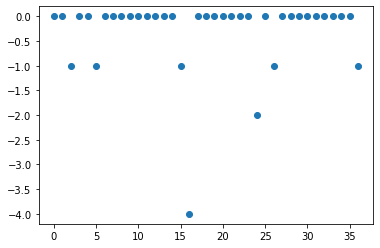

In [ ]:
x=np.array(np.arange(0,x_test.shape[0],1))
plt.scatter(x,y_test-y_preddt)

In [ ]:
y_train.value_counts()

1    53
2    50
3    17
7    12
6     6
5     6
Name: Type of glass, dtype: int64

[Text(0.3949652777777778, 0.9545454545454546, 'Mg <= 0.57\nentropy = 2.105\nsamples = 144\nvalue = [53, 50, 17, 6, 6, 12]'),
 Text(0.1111111111111111, 0.8636363636363636, 'Na <= 0.457\nentropy = 1.861\nsamples = 26\nvalue = [0, 3, 0, 6, 6, 11]'),
 Text(0.05555555555555555, 0.7727272727272727, 'Na <= 0.403\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 0, 6, 0, 0]'),
 Text(0.027777777777777776, 0.6818181818181818, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.08333333333333333, 0.6818181818181818, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.16666666666666666, 0.7727272727272727, 'Ba <= 0.1\nentropy = 1.194\nsamples = 18\nvalue = [0, 1, 0, 0, 6, 11]'),
 Text(0.1388888888888889, 0.6818181818181818, 'Si <= 0.403\nentropy = 1.061\nsamples = 8\nvalue = [0, 1, 0, 0, 6, 1]'),
 Text(0.1111111111111111, 0.5909090909090909, 'Al <= 0.484\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 0, 0, 0, 1]'),
 Text(0.08333333333333333, 0.5, 'entropy = 0.0\nsamples = 1\

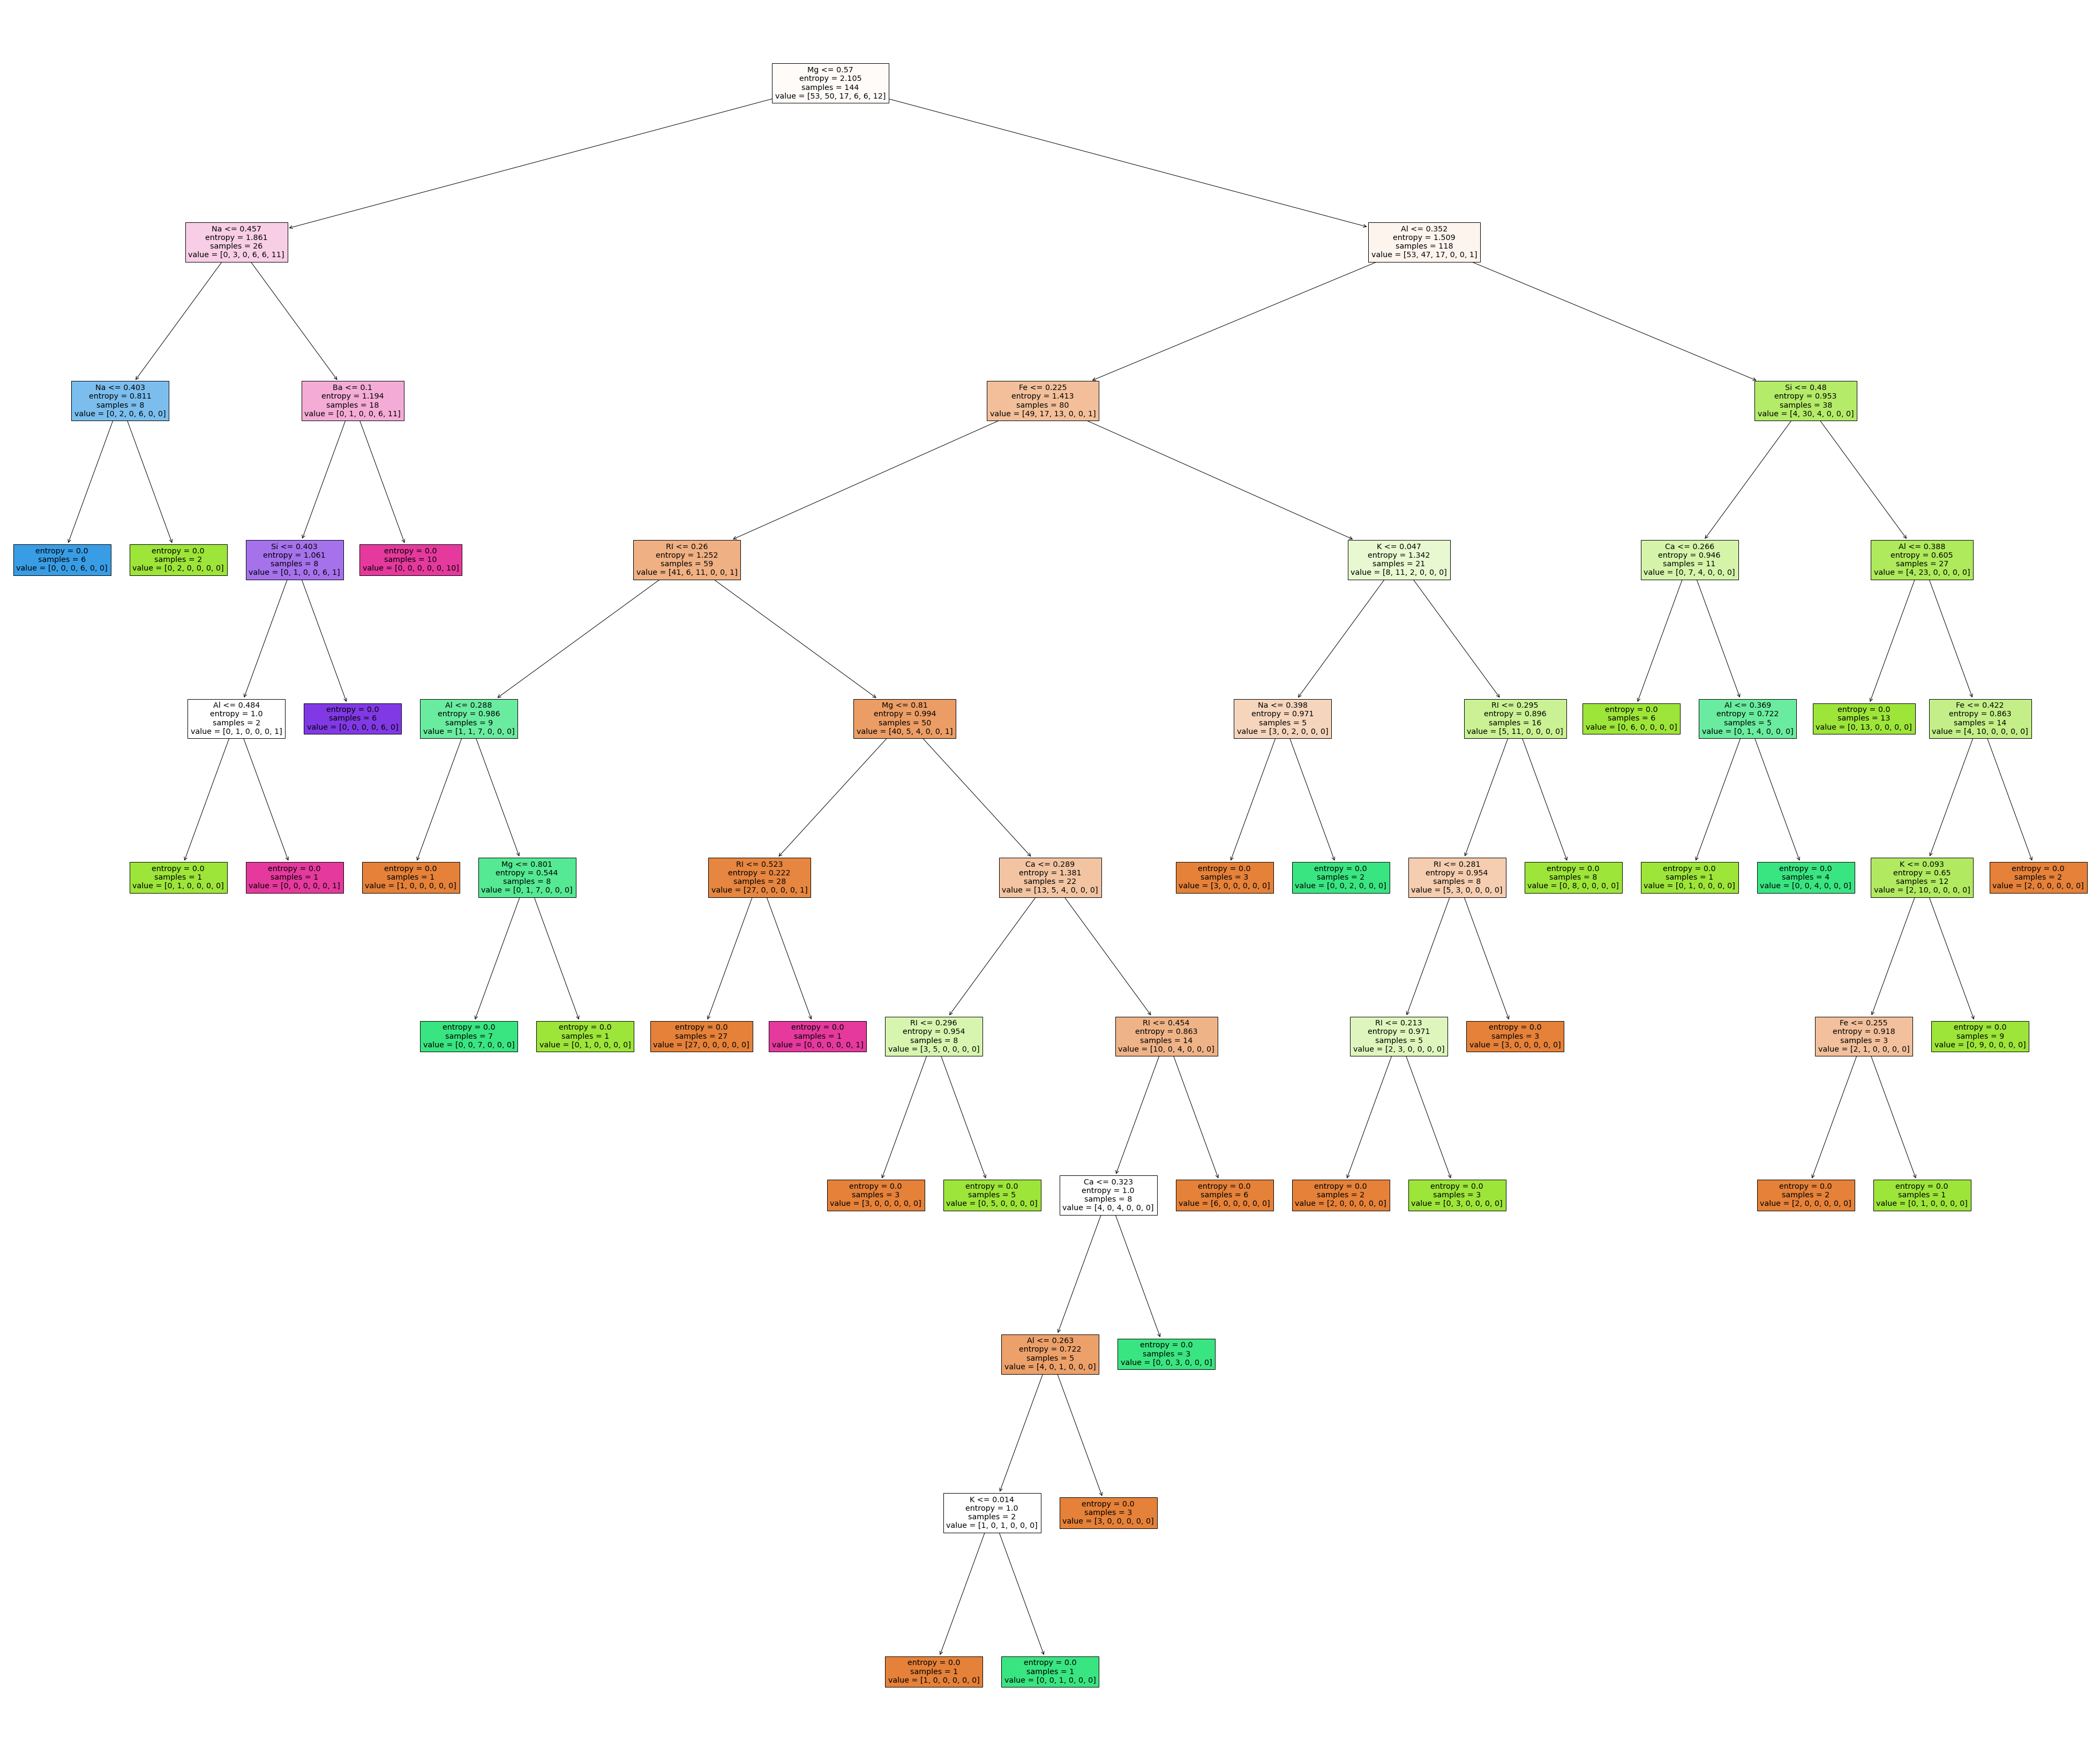

In [ ]:
plt.figure(figsize=(70,60))
tree.plot_tree(test_dt,filled=True,feature_names=features,proportion=False)

***Neural Networks***

---




In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.40540540540540543